In [37]:
import numpy as np, pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [19]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [20]:
x = np.load('lowrank_estimate.npy') 

df = pd.read_csv('../data/data_clean.csv', sep=',', encoding='latin-1')
df = df.drop(columns=['PAQ706'])
df = df[df.BPXSY1.notnull()] 
y = df.BPXSY1.to_numpy() 
# df = df.drop(columns=['BPXSY1']) 
# x = df.to_numpy() 
# col_mean = np.nanmean(x, axis=0)
# inds = np.where(np.isnan(x))
# x[inds] = np.take(col_mean, inds[1]) 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

In [14]:
x_train.shape

(3577, 56)

In [5]:
# model = LinearRegression().fit(x_train, y_train)
# model = Ridge(alpha=1.0)
# model.fit(x_train, y_train)
# model 

Ridge()

Testing ridge regression and lasso

In [40]:
start = -4
stop = 2
err_train = []
err_test = []
# for i in np.arange(start, stop, (stop - start)/30):
for i in np.logspace(start, stop, num=50):
    # model = Ridge(alpha=i)
    model = Lasso(alpha=i)
    model.fit(x_train, y_train)
    r_sq = model.score(x_train, y_train) 
    # print('coefficient of determination:', r_sq) 
    err_train.append(mean_squared_error(y_true=y_train , y_pred=model.predict(x_train)))
    err_test.append(mean_squared_error(y_true=y_test , y_pred=model.predict(x_test)))

# print(err)


/Users/harishchauhan/.virtualenvs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.975e+05, tolerance: 1.166e+02
  model = cd_fast.enet_coordinate_descent(
/Users/harishchauhan/.virtualenvs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.968e+05, tolerance: 1.166e+02
  model = cd_fast.enet_coordinate_descent(
/Users/harishchauhan/.virtualenvs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

[229.27534189857548, 229.2744518593527, 229.27422088621267, 229.27487089759484, 229.274694767378, 229.27457186378808, 229.27588471335142, 229.2761269892971, 229.2763359911473, 229.2755265533135, 229.275645262116, 229.27621957847336, 229.27615697876251, 229.27648139640712, 229.2769676661486, 229.27608073370874, 229.27687914258144, 229.27743948512057, 229.2781833249668, 229.27917117722455, 229.2794527811012, 229.28086292891254, 229.28273351956128, 229.28522397819776, 229.28854422896325, 229.29297865052823, 229.29891493232975, 229.30688581836776, 229.3176305789523, 229.3321872807131, 229.35203404931272, 229.37930962907555, 229.41716428197105, 229.47031427624955, 229.54584849929873, 229.65505298751674, 229.8194656582468, 230.0786953630592, 230.47029373040317, 231.05743833007224, 231.91082716435602, 233.20090877871522, 234.94182286033242, 237.3390361914953, 240.8796521208827, 246.39959830535935, 255.70990744345005, 271.5544590618322, 288.4857590677551, 303.09326005762665]


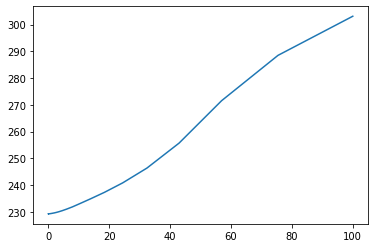

In [41]:
# plt.plot(np.logspace(start, stop, num=50), err_train)
plt.plot(np.logspace(start, stop, num=50), err_test)
print(err_test)

In [6]:
r_sq = model.score(x_train, y_train) 
print('coefficient of determination:', r_sq)

coefficient of determination: 0.3140065372768568


In [7]:
r_sq = model.score(x_test, y_test) 
print('coefficient of determination (test):', r_sq)

coefficient of determination (test): 0.3211846866795547


In [8]:
print('intercept:', model.intercept_) 
print('slope:', model.coef_)

intercept: 60.104336583029486
slope: [ 4.68671775e-01  3.68250049e-05  9.33982352e-03  1.03828685e-02
  2.25397387e-03  4.88960453e-03  2.32706798e-03 -5.26143933e-03
  1.70352446e-02  1.96517911e-02  9.29767272e-03  5.96505462e-02
  6.42148281e-02 -2.93320668e-03  3.34205837e-02  9.64662354e-03
  4.05937671e-02  2.43654693e-03  4.55017501e-01  5.93894027e-03
  6.67906594e-03  3.16957973e-03  3.67649063e-03  4.72725241e-03
  5.99266648e-03  3.98101177e-03  3.85487089e-03  2.84229533e-03
  2.38165203e-02  5.66418794e-03  5.13909215e-03  4.07901696e-03
  4.61374842e-03 -5.28584884e-04 -2.57738157e-02  5.06823103e-03
 -5.45534538e-03  2.72687543e-02 -3.54912402e-03  1.07328128e-02
  6.88324534e-03 -1.78028310e-02  3.65202479e-03  3.11307692e-04
  2.79604411e-02 -2.03651636e-04 -4.90307977e-02  6.44533210e-04
  3.51606513e-03  5.46105464e-03  3.17980138e-03 -2.66317124e-04
  9.60562433e-03  1.31575337e-03 -8.13364894e-04 -3.56392120e-02]


In [9]:
y_pred = model.predict(x_train) 
print('predicted response:', y_pred, sep='\n') 
print('actual response:', y, sep='\n') 

predicted response:
[124.51183652 134.34877356 134.84283338 ... 127.57039792 124.29850225
 132.98641372]
actual response:
[122. 156. 140. ... 164. 110. 136.]


In [10]:
y_pred = model.predict(x) 
print('predicted response:', y_pred, sep='\n') 
print('actual response:', y, sep='\n') 

predicted response:
[132.99316239 129.24252648 142.35465887 ... 136.7679094  110.42250846
 125.30112335]
actual response:
[122. 156. 140. ... 164. 110. 136.]
